In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

### (a) Generate a simulated data set as follows:

In [96]:
np.random.seed(1)

X = np.random.normal(0,1,100)
y = X - 2*(X**2) + np.random.normal(0,1,100)

### (b) Create a scatterplot of X against Y . Comment on what you find.

C:\Users\Amer Kamal\Documents\AI\boston_LR_project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

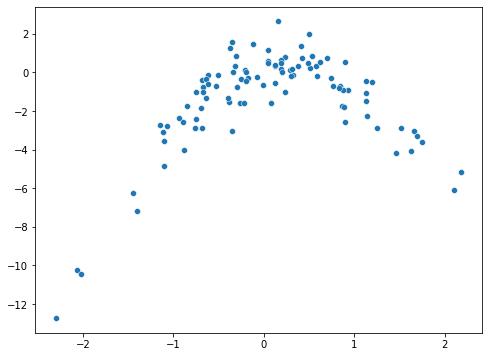

In [97]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (8, 6))
sns.scatterplot(X, y,ax=ax)

### (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:

In [98]:
np.random.seed(1)
for i in range(1,5):
    poly = PolynomialFeatures(i,include_bias=False)
    predictors = poly.fit_transform(X.reshape(-1,1))
    lr = LinearRegression()
    error = -1*cross_val_score(lr,predictors,y,cv = len(X),scoring = 'neg_mean_squared_error').mean()
    print('For model {} , error is {}'.format(i,error))

For model 1 , error is 6.260764331604616
For model 2 , error is 0.9142897072803661
For model 3 , error is 0.9268768781648801
For model 4 , error is 0.8669116865881082


### (d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [99]:
np.random.seed(2)
for i in range(1,5):
    poly = PolynomialFeatures(i,include_bias=False)
    predictors = poly.fit_transform(X.reshape(-1,1))
    lr = LinearRegression()
    error = -1*cross_val_score(lr,predictors,y,cv = len(X),scoring = 'neg_mean_squared_error').mean()
    print('For model {} , error is {}'.format(i,error))

For model 1 , error is 6.260764331604616
For model 2 , error is 0.9142897072803661
For model 3 , error is 0.9268768781648801
For model 4 , error is 0.8669116865881082


Identical values

### (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

We expect that the lowest value is the model 2, because we know the function is cuadratic, therefore the model 4 has the lowest value.

### (f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [126]:

poly = PolynomialFeatures(2,include_bias=False)
data_poly2 = poly.fit_transform(X.reshape(-1,1))
data2 = pd.DataFrame(data_poly2,columns=['x1','x2'])
data2['y']=y
lr = LinearRegression().fit(data2[['x1','x2']],y)

In [128]:
lr.coef_

array([ 1.09361962, -1.9845774 ])